<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Técnicas-de-aprendizaje-supervisado" data-toc-modified-id="Técnicas-de-aprendizaje-supervisado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Técnicas de aprendizaje supervisado</a></span><ul class="toc-item"><li><span><a href="#Practica-de-Intercomparación-aplicada-a-datos-meteorológicos" data-toc-modified-id="Practica-de-Intercomparación-aplicada-a-datos-meteorológicos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Practica de Intercomparación aplicada a datos meteorológicos</a></span><ul class="toc-item"><li><span><a href="#Santander-Meteorology-Group" data-toc-modified-id="Santander-Meteorology-Group-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Santander Meteorology Group</a></span></li></ul></li></ul></li><li><span><a href="#Conjunto-de-datos-meteo" data-toc-modified-id="Conjunto-de-datos-meteo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conjunto de datos meteo</a></span></li><li><span><a href="#Árboles-de-clasificación-y-regresión-(2.5-puntos)" data-toc-modified-id="Árboles-de-clasificación-y-regresión-(2.5-puntos)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Árboles de clasificación y regresión (2.5 puntos)</a></span></li><li><span><a href="#Random-forests-(2.5-puntos)" data-toc-modified-id="Random-forests-(2.5-puntos)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random forests (2.5 puntos)</a></span></li><li><span><a href="#Modelos-lineales-generalizados-(GLMs)-(1.5-puntos)" data-toc-modified-id="Modelos-lineales-generalizados-(GLMs)-(1.5-puntos)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelos lineales generalizados (GLMs) (1.5 puntos)</a></span></li><li><span><a href="#k-nearest-neighbors-(k-NN)-(1.5-puntos)" data-toc-modified-id="k-nearest-neighbors-(k-NN)-(1.5-puntos)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>k nearest neighbors (k-NN) (1.5 puntos)</a></span></li><li><span><a href="#Conclusiones-generales-(2-puntos)" data-toc-modified-id="Conclusiones-generales-(2-puntos)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones generales (2 puntos)</a></span></li></ul></div>

# Minería de Datos (Master en Data Science, UIMP-UC)

## Técnicas de aprendizaje supervisado

### Practica de Intercomparación aplicada a datos meteorológicos

#### Santander Meteorology Group

En esta práctica haremos una intercomparación de varias de las técnicas de aprendizaje supervisado vistas a lo largo de la asignatura (CART, k-NN, GLMs y Random Forests). Por tanto, pretende ser un repaso general de cara al examen en el que el objetivo es tratar de entender las ventajas y limitaciones de las distintas técnicas para un caso de aplicación particular; la predicción de precipitación. La entrega consistirá en un notebook (Jupyter o R-Markdown), junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

## Conjunto de datos meteo

Comenzaremos cargando el dataset meteo, que ya ha sido utilizado en sesiones anteriores. Como ya sabéis, la variable objetivo en este dataset es la precipitation diaria en Lisboa durante el período 1979-2008, y para modelizar ésta se dispone de un conjunto de 8 variables meteorológicas predictoras que describen la circulación de larga escala definidas sobre un dominio geográfico que incluye 40 puntos sobre la Península Ibérica. (en total 8×40=320 variables explicativas). Las variables predictoras son:

* altura geopotencial en 500 hPa (Z500)
* temperatura del aire en 850 hPa, 700 hPa, 500 hPa (ta850, ta700 y ta500), y en superficie (tas)
* humedad específica del aire en 850 hPa y 500 hPa (hus850, hus500)
* presión a nivel del mar (psl)

Para agilizar los tiempos de cómputo, reduciremos la dimensionalidad del problema. Como ya se ha visto en sesiones anteriores, una alternativa para tal fin es el uso de PCs. Sin embargo, para no limitar la interpretabilidad de los resultados obtenidos con árboles, utilizaremos otra aproximación aquí. En concreto, optaremos por un análisis de correlaciones, en el que se calcula la correlación de Spearman entre nuestra variable objetivo y todas las variables predictoras disponibles. La asunción de partida es que cuanto más fuerte sea esta correlación, mayor es el vínculo físico entre predictando y predictor, y por tanto, más útil es la información que nos aporta ese predictor. Por tanto, este análisis nos permite descartar predictores poco relevantes. Siguiendo esta idea, calcularemos la correlación existente entre nuestro predictando y los 320 predictores, y eliminaremos aquellos con correlaciones entre -0.4 y 0.4. ¿Cuánto se ha reducido la dimensionalidad del problema?

In [1]:
## Incluir el codigo y responder a la cuestion
data = read.csv("meteo.csv")
df = data[, -1]; rm(data)
colnames(df)[1] = "precip"
head(df,n=5)

,precip,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.9,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101985.9,101627.3,101357.2,101110.7,101291.0,101814.9,101479.4,101164.5,100970.7,100905.3
2,0.6,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102048.1,102069.7,102204.5,102480.3,102858.8,101973.3,102033.3,102165.5,102323.9,102534.2
3,13.0,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,102399.1,102448.4,102438.3,102434.3,102339.8,102669.7,102565.5,102530.3,102453.6,102487.1
4,0.0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,100970.0,100672.8,100360.7,100133.7,100028.4,101126.2,100700.0,100381.3,100118.3,100319.8
5,0.0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,100652.7,100663.5,100747.7,100934.0,101015.8,100801.6,100685.3,100777.5,100909.4,101164.7


In [2]:
length(df[1,-1]) #numero inicial de variables predictoras

[1] 320

In [3]:
cor.spearman <- cor(df[,1],df[,-1],method = "spearman")
ind.predictor <- which(abs(cor.spearman)>0.4) #variables relevantes
length(ind.predictor)

[1] 37

In [4]:
y <- df[1:5000,1]
x <- df[1:5000,-1]
x <- x[,ind.predictor]

In [5]:
length(df[1,-1])-length(ind.predictor) #numero de variables que se han quitado

[1] 283

In [6]:
set.seed(1)
n <- length(y)
ind.train <- sample(1:n, round(0.75*n))
ind.test <- setdiff(1:n,ind.train)
y.train <- y[ind.train]
y.test <- y[ind.test]
x.train <- x[ind.train,]
x.test <- x[ind.test,]

Para simplificar aún más los cálculos, nos limitaremos a los primeros 5000 días del dataset. Como siempre, consideraremos una partición de la muestra en dos subconjuntos independientes, train y test, escogidos aleatoriamente (75% para entrenar y 25% para validar).

## Árboles de clasificación y regresión (2.5 puntos)

Como ya hemos visto en sesiones anteriores, tendremos que crear dos modelos independientes, uno para la clasificación del evento binario lluvia/no lluvia y otro para el evento continuo cantidad de lluvia. Nos centramos en primer lugar en la clasificación lluvia/no lluvia. Para ello, tenemos que crear la variable binaria ocurrencia de precipitación (considera un umbral de 1 mm) y construir el dataframe asociado al problema.

A continuación construiremos el árbol completo (usa la función tree). ¿Cuántos nodos terminales obtienes? ¿Qué variables predictoras dan lugar a las primeras subdivisiones del árbol?

In [7]:
## Incluir el codigo y responder a la cuestion
occ = y
occ = ifelse(y < 1, 0, 1)
occ = as.factor(occ)
df.occ = data.frame(ocurrencia = occ, predictores = x)
head(df.occ,n=5)

,ocurrencia,predictores.X1,predictores.X2,predictores.X3,predictores.X4,predictores.X5,predictores.X6,predictores.X7,predictores.X8,predictores.X9,⋯,predictores.X285,predictores.X289,predictores.X290,predictores.X294,predictores.X295,predictores.X299,predictores.X300,predictores.X304,predictores.X305,predictores.X310
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101630.11,101951.2,101637.30,101851.9,101647.36,101771.5,101608.23,101599.4,101552.05,101491.42
2,0,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102157.66,102307.5,102222.22,102337.1,102366.47,102384.1,102581.66,102490.5,102765.78,102937.78
3,1,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,100296.72,101128.8,100516.84,101360.8,100761.91,101570.8,101107.28,101841.0,101525.97,101967.72
4,0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,99925.61,100301.7,99681.23,100185.7,99495.23,100173.6,99425.98,100082.4,99530.73,99719.67
5,0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,101148.34,100947.7,100945.84,100928.0,100825.59,100927.7,100779.03,100934.7,100809.59,100895.84



Classification tree:
tree(formula = ocurrencia ~ ., data = df.occ, subset = ind.train, 
    mincut = 1, minsize = 2, mindev = 0)
Number of terminal nodes:  290 
Residual mean deviance:  0 = 0 / 3460 
Misclassification error rate: 0 = 0 / 3750 

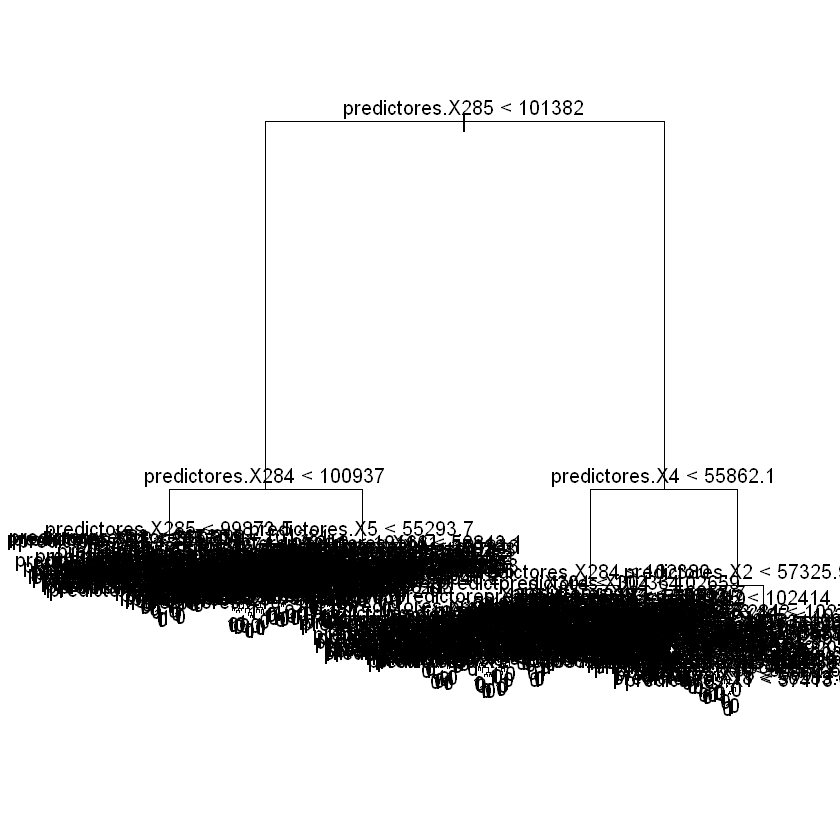

In [67]:
library(tree)
tree.occ = tree(ocurrencia ~., data=df.occ, subset = ind.train, mincut = 1, minsize = 2, mindev = 0)

plot(tree.occ); text(tree.occ,pretty = F)
summary(tree.occ)

* Hay 290 nodos terminales y las variables predictoras que se usan primero son X285, X284 y X4.

Para simplificar este árbol tan complejo tendremos que podarlo adecuadamente. Utiliza una cross-validación con un 10-fold para encontrar el número de nodos terminales del árbol óptimo. ¿Cuál es este número? ¿Qué predictores aparecen como los más importantes?

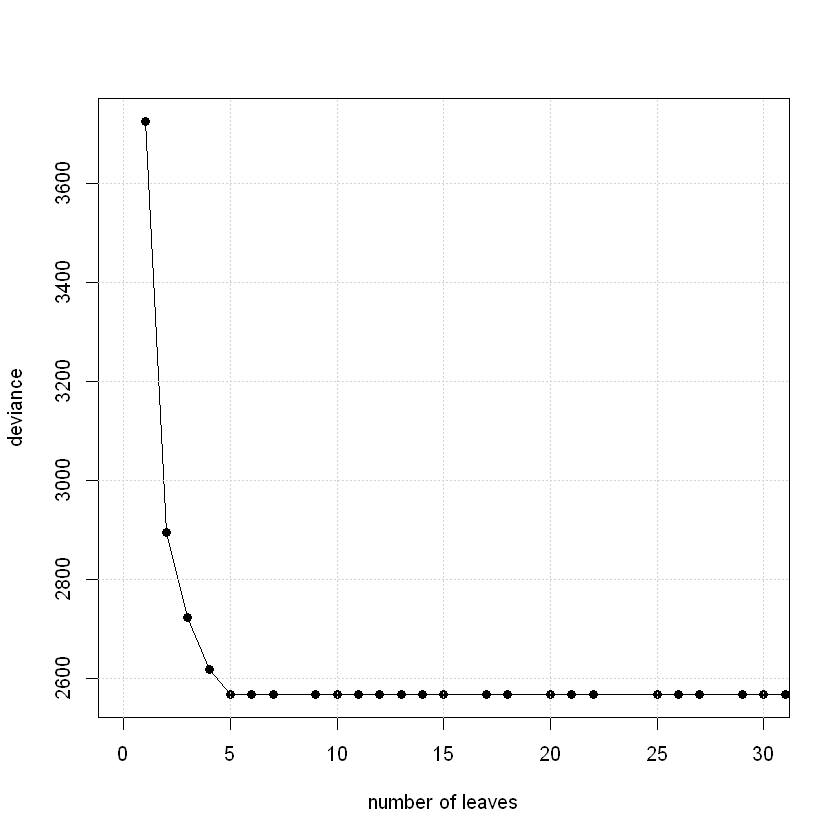

In [9]:
## Incluir el codigo y responder a la cuestion
#cálculo del número de nodos terminales optimo
set.seed(1)
tree.occ.cv = cv.tree(tree.occ, K = 10)  
plot(tree.occ.cv$size, tree.occ.cv$dev,
     type = "o", pch = 19,
     xlab = "number of leaves", ylab = "deviance",
     xlim = c(0,30))
grid()

In [68]:
tree.occ.opt <- prune.tree(tree.occ, best=5)

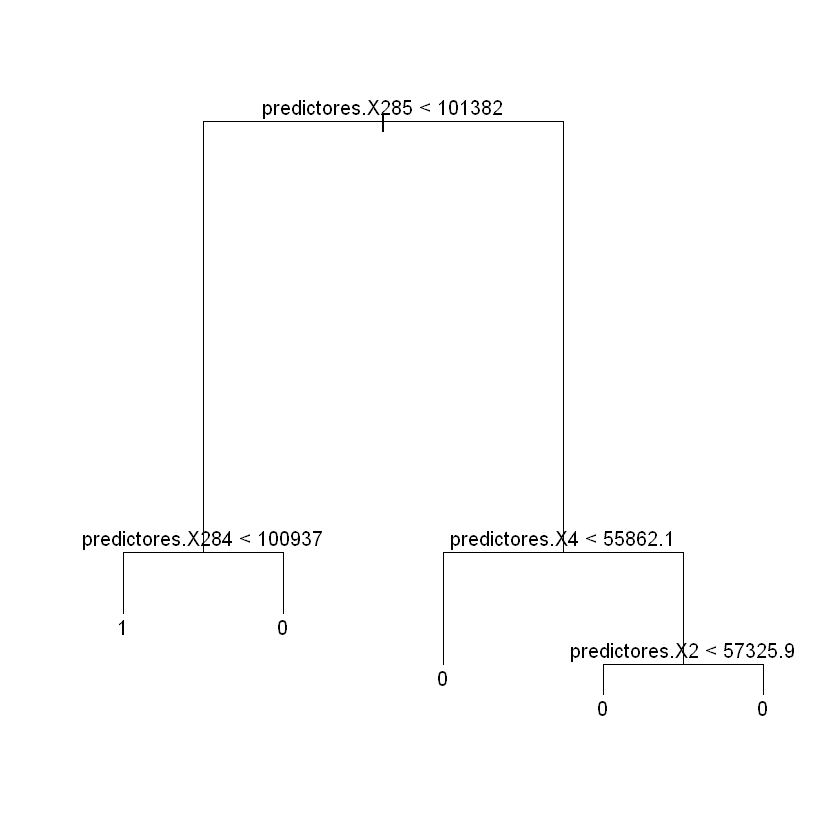

In [11]:
plot(tree.occ.opt)
text(tree.occ.opt)

In [12]:
summary(tree.occ.opt)


Classification tree:
snip.tree(tree = tree.occ, nodes = c(4L, 6L, 14L, 5L))
Variables actually used in tree construction:
[1] "predictores.X285" "predictores.X284" "predictores.X4"   "predictores.X2"  
Number of terminal nodes:  5 
Residual mean deviance:  0.6593 = 2469 / 3745 
Misclassification error rate: 0.144 = 540 / 3750 

* El deviance decrece las 5 hojas, valor a partir del cual se estabiliza. Por tanto podemos tomar como número de nodos terminales óptimo 5, ya que se consigue una precisión igual que para la zona mayor que 5 mostrada en la gráfica, y al mismo tiempo se reduce el riesgo de sobreajuste. Por otro lado, las variables que más discriminan siguen siendo las mismas que en el caso del árbol completo para la ocurrencia: X285, X284, y X4.

Utiliza este árbol óptimo para predecir en el test. Guarda las predicciones.

Una vez obtenidas las predicciones de ocurrencia pasaremos a estimar la cantidad de precipitación. Primero creamos el dataset correspondiente.

A continuación construiremos dos árboles, uno entrenado sobre todo el conjunto de train y otro entrenado sólo sobre los días de lluvia (en el train). Empezamos por el primero de estos árboles. Construye el árbol completo ¿Cuántos nodos terminales obtienes? ¿Qué variables predictoras dan lugar a las primeras subdivisiones del árbol? ¿Son las mismas que para el caso de la ocurrencia?

In [13]:
## Incluir el codigo y responder a la cuestion
occ.pred <- predict(tree.occ.opt,df.occ[ind.test,],type = "class")

In [14]:
df.prec <- data.frame(precipitacion = y, predictor =x)


Regression tree:
tree(formula = precipitacion ~ ., data = df.prec, subset = ind.train, 
    mincut = 1, minsize = 2, mindev = 0)
Number of terminal nodes:  950 
Residual mean deviance:  0.002834 = 7.936 / 2800 
Distribution of residuals:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.3000000 -0.0042550 -0.0007968  0.0000000  0.0000000  0.2970000 

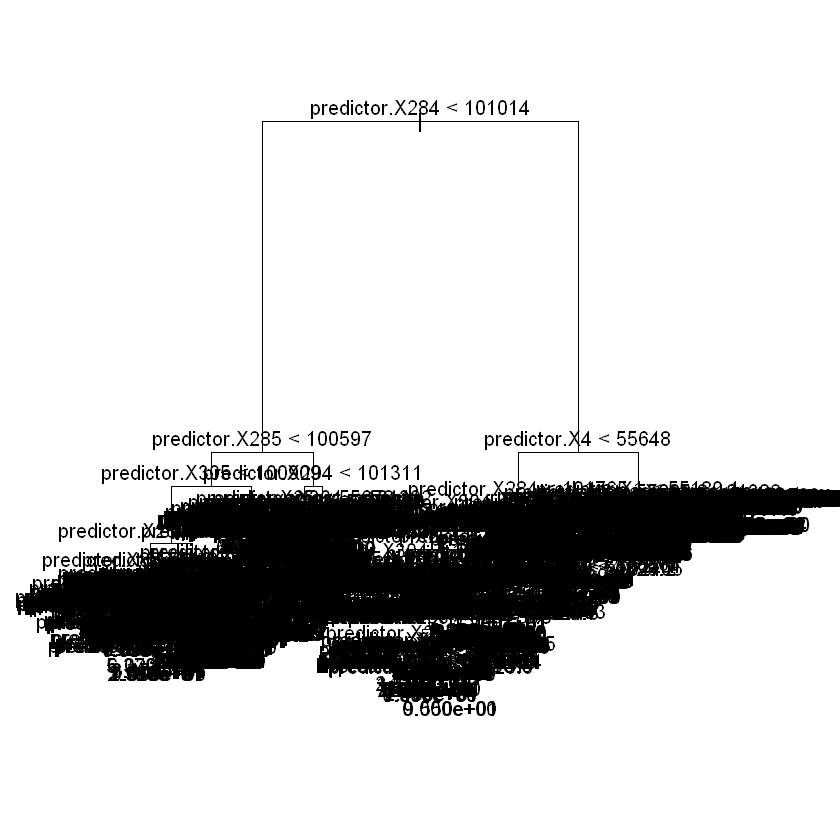

In [69]:
t.tree1 = Sys.time()
tree.prec = tree(precipitacion ~., data=df.prec, subset = ind.train, mincut = 1, minsize = 2, mindev = 0)
t.tree2 = Sys.time()
plot(tree.prec); text(tree.prec,pretty = F)
summary(tree.prec)

* Aumenta el número de nodos terminales respecto al árbol completo para la ocurrencia, ascendiendo a 950. Por otro lado, las variables que producen las primeras divisiones son las mismas que para el árbol completo en el caso de la ocurrencia, X4, X285, y X284.

Al igual que hicimos para el caso de la ocurrencia, tendremos que podar este árbol tan complejo. Utiliza una cross-validación con un 10-fold para encontrar el número de nodos terminales del árbol óptimo. ¿Cuál es este número? ¿Qué predictores aparecen como los más importantes?

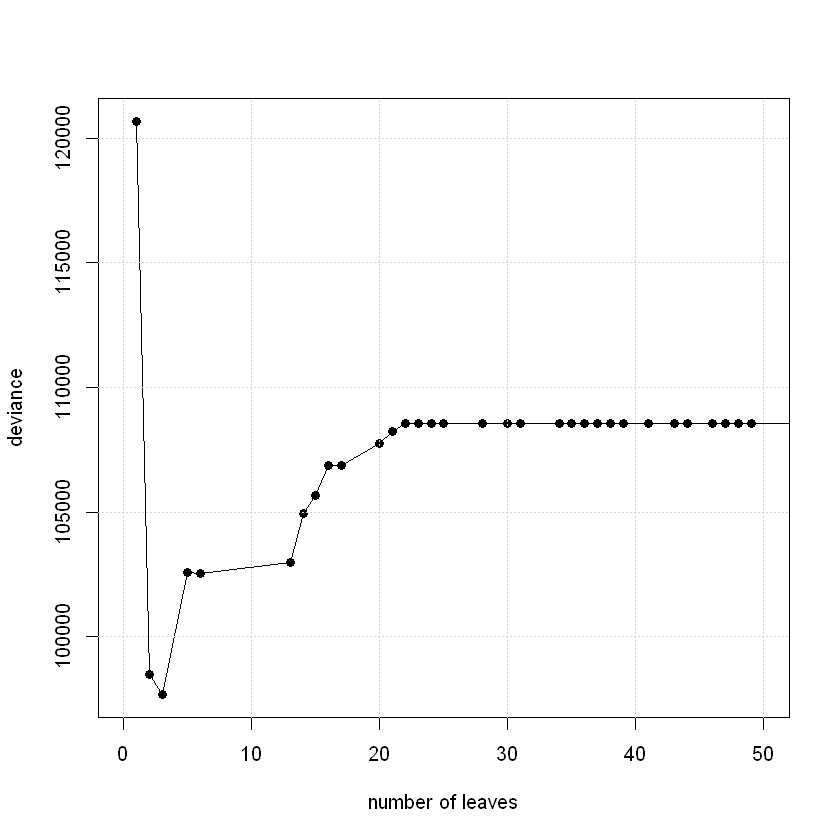

In [16]:
## Incluir el codigo y responder a la cuestion
set.seed(1)
tree.prec.cv = cv.tree(tree.prec, K = 10)  
plot(tree.prec.cv$size, tree.prec.cv$dev,
     type = "o", pch = 19,
     xlab = "number of leaves", ylab = "deviance",
     xlim = c(0,50))
grid()

In [70]:
t.tree3 = Sys.time()
tree.prec.opt <- prune.tree(tree.prec, best=3)
t.tree4 = Sys.time()
t.tree <- difftime(t.tree2, t.tree1, units = "secs") + difftime(t.tree4, t.tree3, units = "secs")

In [18]:
summary(tree.prec.opt)


Regression tree:
snip.tree(tree = tree.prec, nodes = c(7L, 6L, 2L))
Variables actually used in tree construction:
[1] "predictor.X284" "predictor.X4"  
Number of terminal nodes:  3 
Residual mean deviance:  25.05 = 93860 / 3747 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8.9710 -1.5290 -0.3009  0.0000 -0.3009 92.9500 

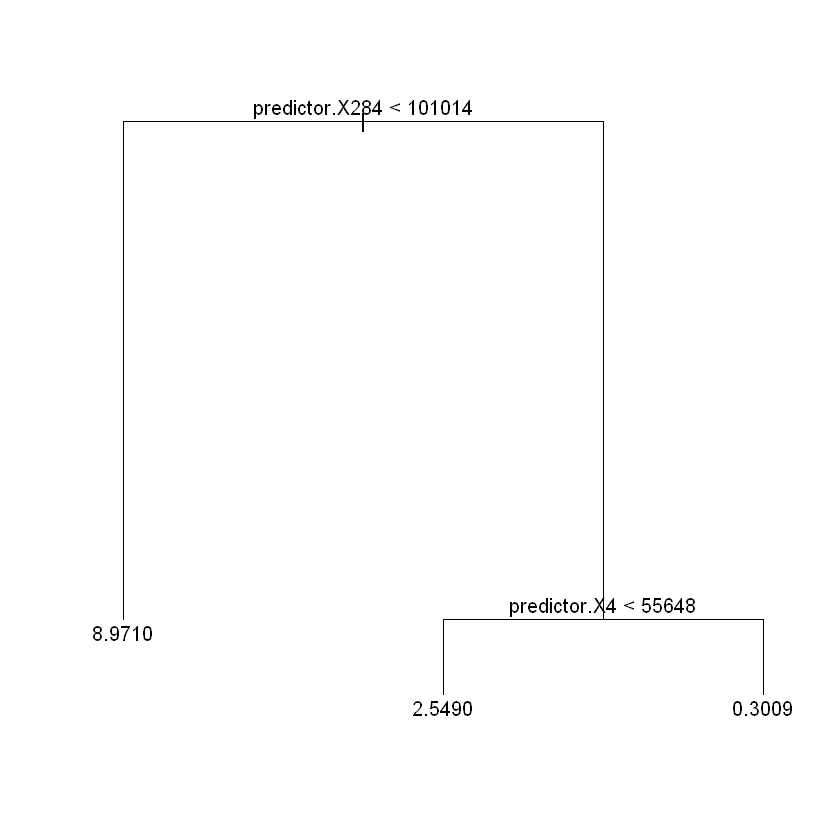

In [19]:
plot(tree.prec.opt)
text(tree.prec.opt)

* En este caso el número óptimo de hojas obtenido es 3, que corresponde al mínimo de la curva del deviance, y las variables usadas son X284 y X4. La única diferencia, respecto a las variables más usadas, que se ve entre los árboles óptimo y completo de los casos en que se estudia la ocurrencia o la precipitación es que en los de ocurrencia la variable X285 es la que aparece en el nodo raíz, mientras que en los árboles para precipitación es la X284.

Utiliza el árbol óptimo que acabas de encontrar para predecir en el test, y conserva la predicción obtenida.

Repite el mismo proceso para el segundo árbol de regresión (el que sólo se entrena sobre los días de lluvia en el train).

Obtén las dos series predichas completas para el test (la secuencia lluvia/no lluvia será la misma en las dos) y valida tus resultados en función de las siguiente métricas:

Para la parte binaria lluvia/no lluvia: Accuracy.
Para la serie completa: RMSE, correlación de Spearman y ratio de varianzas.
Pregunta: ¿Cuál de los dos árboles da mejores resultados? ¿Por qué?

In [20]:
## Incluir el codigo y responder a la cuestion
prec.pred <- predict(tree.prec.opt,df.prec[ind.test,])

In [21]:
noLluvia <- which(y<1)

In [22]:
ind.train2 <- setdiff(ind.train,noLluvia)
ind.test2 <- setdiff(ind.test,noLluvia)


Regression tree:
tree(formula = precipitacion ~ ., data = df.prec, subset = ind.train2, 
    mincut = 1, minsize = 2, mindev = 0)
Number of terminal nodes:  598 
Residual mean deviance:  0.01503 = 2.134 / 142 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -0.2     0.0     0.0     0.0     0.0     0.2 

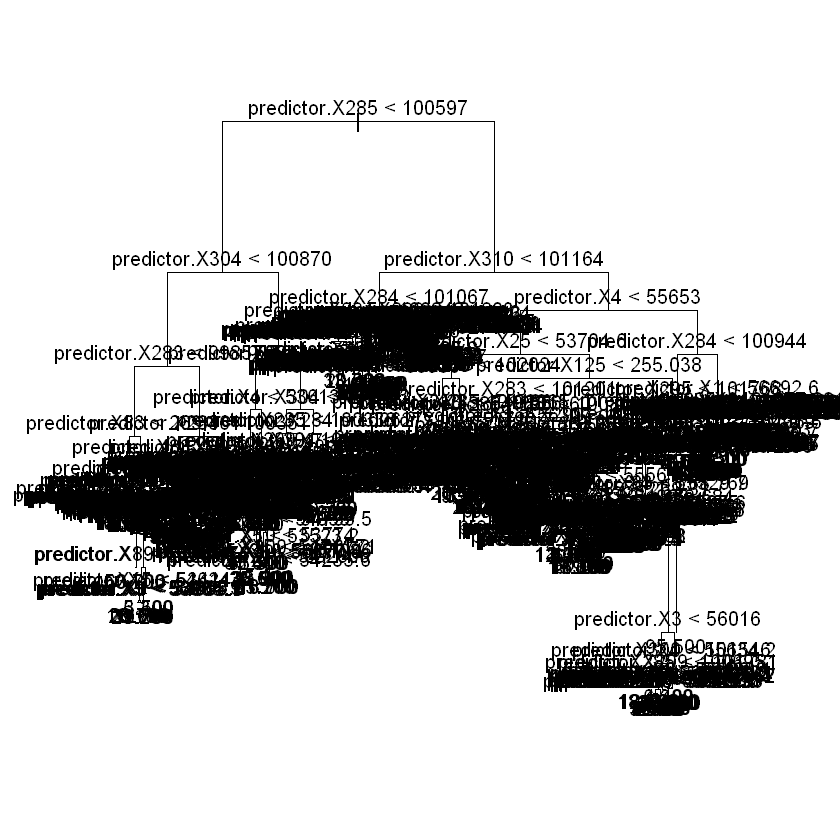

In [23]:
tree.prec2 = tree(precipitacion ~., data=df.prec, subset = ind.train2, mincut = 1, minsize = 2, mindev = 0)
plot(tree.prec2); text(tree.prec2,pretty = F)
summary(tree.prec2)

* Se obtienen 598 nodos terminales. Por otro lado, las variables con más influencia en la predicción han cambiado respecto a los árboles completos anteriores, siendo ahora X285, X304 y X310.

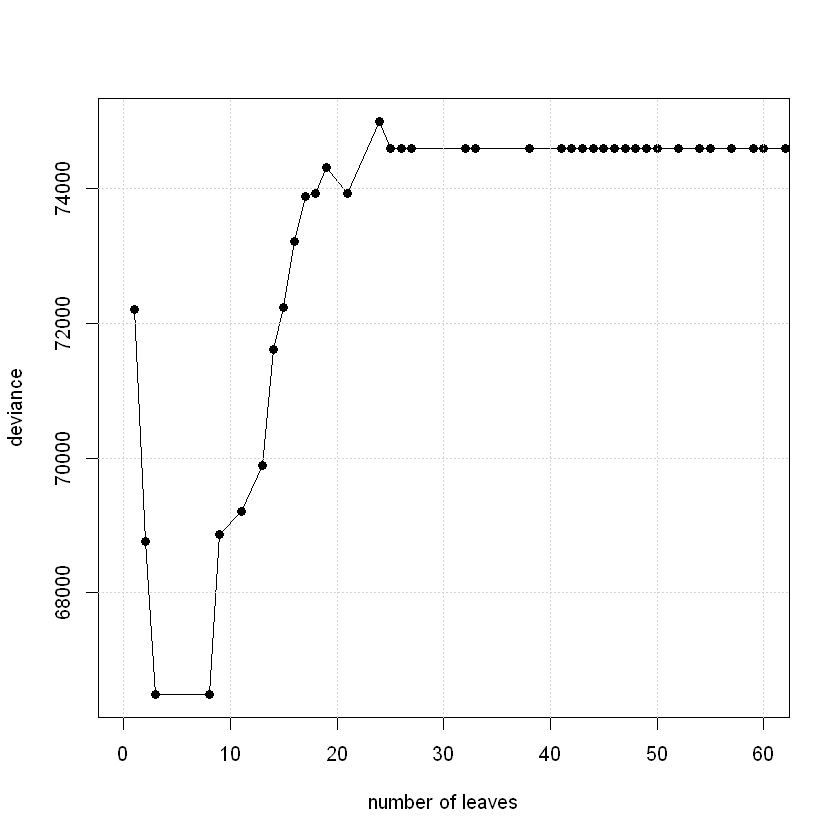

In [24]:
set.seed(7)
tree.prec.cv2 = cv.tree(tree.prec2, K = 10)  
plot(tree.prec.cv2$size, tree.prec.cv2$dev,
     type = "o", pch = 19,
     xlab = "number of leaves", ylab = "deviance",
     xlim = c(0,60))
grid()

In [25]:
posmin <- which.min(rev(tree.prec.cv2$dev))
rev(tree.prec.cv2$size)[posmin]

[1] 3

* Se alcanza un mínimo para el deviance para un árbol de 3 hojas. 

In [26]:
tree.prec.opt2 <- prune.tree(tree.prec2, best=3)

In [27]:
summary(tree.prec.opt2)


Regression tree:
snip.tree(tree = tree.prec2, nodes = 5:3)
Variables actually used in tree construction:
[1] "predictor.X285" "predictor.X304"
Number of terminal nodes:  3 
Residual mean deviance:  87.35 = 64370 / 737 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-16.290  -5.801  -2.999   0.000   3.795  87.990 

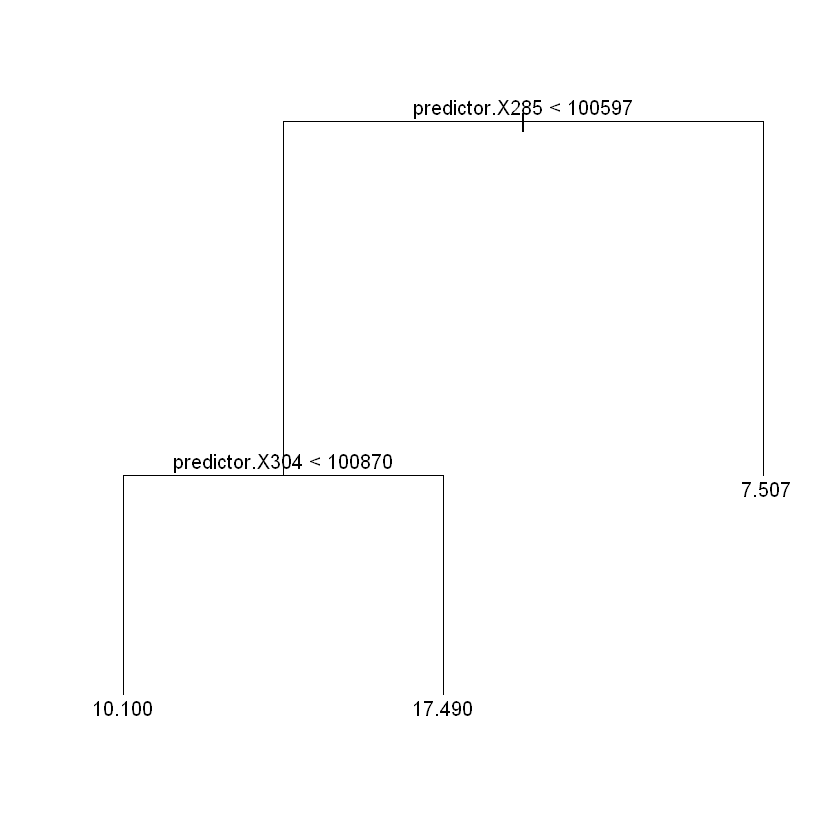

In [28]:
plot(tree.prec.opt2)
text(tree.prec.opt2)

* En este caso las variables que más discriminan los datos son X285 y X304.

In [29]:
prec.pred2 <- predict(tree.prec.opt2,df.prec[ind.test2,])

In [30]:
## validation
# RMSE
rmse <- function(x, y) {
    stopifnot(length(x) == length(y))
    sqrt(mean((x - y)^2))
}
## accuracy binary
acc.class = function(x, y) {
  stopifnot(length(x) == length(y))
  return(sum(diag(table(x, y))) / length(x))
}

In [31]:
#análisis 
oc <- occ[ind.test]
p <- df.prec[ind.test,1]
p2 <- df.prec[ind.test2,1]
acc.occ <- acc.class(occ.pred,oc)
rmse1 <- rmse(prec.pred,p)
spearman1<-cor(prec.pred,p,method="spearman")
ratio.var1<-var(prec.pred)/var(p)
rmse2 <- rmse(prec.pred2,p2)
spearman2<-cor(prec.pred2,p2,method="spearman")
ratio.var2<-var(prec.pred2)/var(p2)

In [32]:
print(paste0("Accuracy: ",acc.occ))
print('---')
print(paste0("rmse1: ",rmse1))
print(paste0("spearman1: ",spearman1))
print(paste0("ration.var1: ",ratio.var1))
print('---')
print(paste0("rmse2: ",rmse2))
print(paste0("spearman2: ",spearman2))
print(paste0("ratio.var2: ",ratio.var2))

[1] "Accuracy: 0.8504"
[1] "---"
[1] "rmse1: 4.88813313543855"
[1] "spearman1: 0.606101849541548"
[1] "ration.var1: 0.217385906230219"
[1] "---"
[1] "rmse2: 9.43069938080372"
[1] "spearman2: 0.158165809141824"
[1] "ratio.var2: 0.118979217339128"


* Se obtiene un valor razonable del accuracy, del 85%, para el árbol de clasificación. Por otro lado, respecto a los árboles de regresión, observamos lo siguiente: el rmse del primer árbol es la mitad que el del segundo, indicando que las predicciones del segundo se desvían en general más de los valores reales que las del primer árbol; atendiendo al coeficiente de spearman, con el primer árbol se consigue bastante más correlación entre el cálculo y los valores experimentales que con el segundo. Un valor de 0.6 es relativamente alto, indicando que para el primer árbol de regresión un aumento en la precipitación predicha tiene bastante probabilidad de ir acompañado de un aumento en la precipitación medida. Por el contrario, el valor de 0.16 implica poca correlación entre la predicción y la medida real de la lluvia. Por último, respecto al ratio de varianzas, el árbol primero describe mejor la varianza de la muestra que el segundo, aunque en general los dos son bastante bajos. Hay que tener en cuenta que en una muestra experimental se tiene un factor de ruido que en un modelo no se tiene.

* Se han observado mejores resultados en el primer árbol que en segundo atendiendo a las métricas de validación utilizadas. Esto ocurre porque la parte de la muestra que ofrece información relevante para describir un evento, como la precipitación en este caso, no solo es aquella en que se da el fenómeno, sino toda. Por tanto, el segundo árbol está siendo entrenado con una muestra con la que se ha perdido información sobre el conjunto de datos, y como resultado se obtienen resultados en general menos precisos.

## Random forests (2.5 puntos)

A continuación vamos a realizar el mismo ejercicio pero sustituyendo árboles individuales por random forests, empleando para ello en este ejercicio la técnica de “bagging”. Empecemos con el evento ocurrencia. Para estimar cuál sería el tamaño óptimo de nuestro random forest, prueba bosques de hasta 1000 árboles (utiliza la función randomForest) y plotea los errores “Out-Of-Bag” (OOB). ¿Con cuántos árboles te quedarías?

In [33]:
## Incluir el codigo y responder a la cuestion

In [34]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [35]:
set.seed(123)
rf.occ = randomForest(ocurrencia ~., df.occ , subset = ind.train,sampsize= 1000)

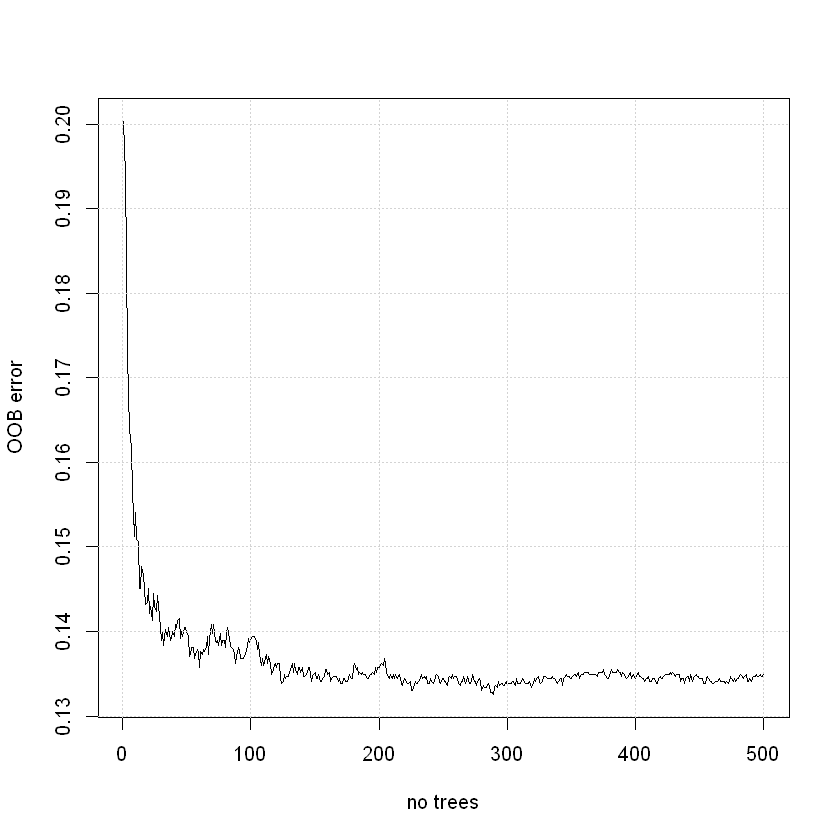

In [36]:
# OOB error
plot(rf.occ$err.rate[, 1], type = "l", xlab = "no trees",
ylab = "OOB error")
grid()

* Tomamos como número óptimo de árboles uno en que se obtenga un valor del error OOB bajo. Para ello, consideramos la zona de la gráfica donde se estabiliza el error, y tomamos valores menores dentro de esa zona, que minimizan el error y al mismo tiempo disminuyen la complejidad del modelo. En este caso, marcamos como zona estable los valores a partir de 200 aproximadamente, y tomamos 200 como número óptimo.

***Nota:*** Hemos visto en la teoría que además del número de árboles, el otro parámetro a ajustar en los random forests es el número de predictores que se consideran en cada nodo para el splitting. En este ejemplo utlizaremos los valores típicos; n−−√ en problemas de clasificación y n/3 en problemas de predicción (siendo n el número total de predictores disponibles).

Utiliza el bosque de tamaño óptimo parar predecir la ocurrencia en el test, y conserva la predicción.

Seguidamente, tal y como hicimos con los árboles individuales, vamos a crear dos random forests para la cantidad, uno que se entrene sobre todo el dataset de train y otro que se entrene sólo sobre los días de lluvia (en el train). De nuevo, tendrás que estimar cuál es el número óptimo de árboles en cada uno de ellos (prueba bosques de hasta 1000 árboles). ¿Qué tamaños óptimos obtienes?

In [37]:
## Incluir el codigo y responder a la cuestion
n=length(x[1,])
ntree <- 200
mtry.occ <- round(sqrt(n))
mtry.prec <- round(n/3)

In [71]:
set.seed(1)
rf.occ.opt <- randomForest(ocurrencia ~., df.occ, subset = ind.train, ntree = ntree, mtry = mtry.occ)

In [39]:
pred.occ = predict(rf.occ.opt, df.occ[ind.test, ])

In [72]:
#r.f. para cantidad. dataset train
set.seed(1)
t.rf1 = Sys.time()
rf.prec = randomForest(precipitacion ~., df.prec , subset = ind.train, sampsize= 1000)
t.rf2 = Sys.time()
t.rf <- difftime(t.rf2, t.rf1, units = "secs")

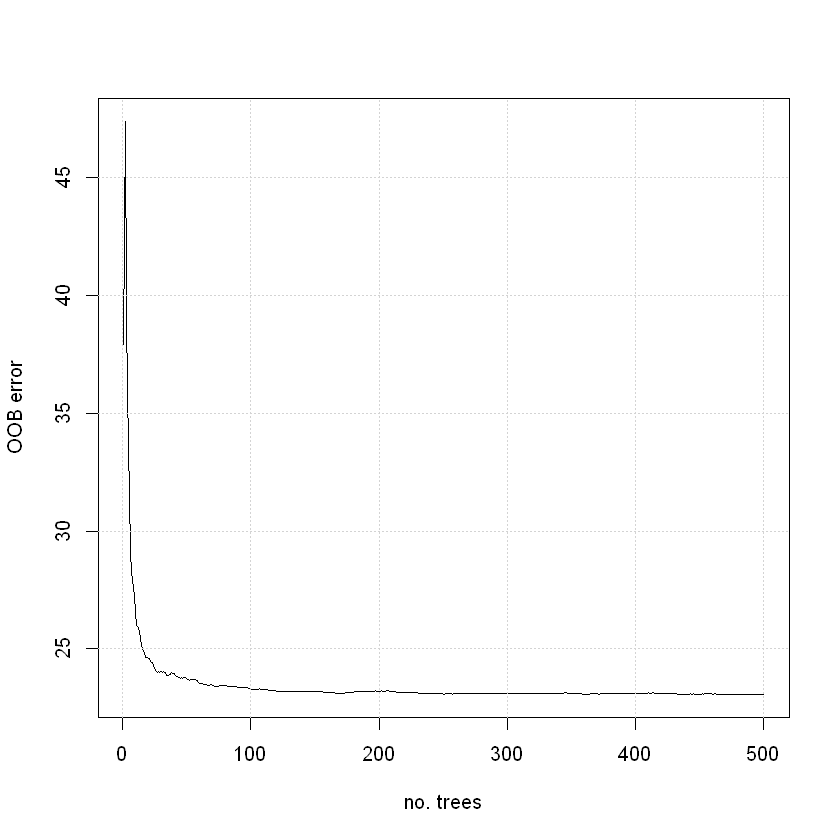

In [41]:
plot(rf.prec$mse, type = "l", xlab = "no. trees",
ylab = "OOB error"); grid()

* Consideramos la zona estable del OOB error a partir de 100 y tomamos este valor como número óptimo de árboles.

In [42]:
ntree <- 100
set.seed(1)
rf.prec.opt <- randomForest(precipitacion ~ .,  df.prec, subset = ind.train, ntree = ntree, mtry = mtry.prec)

In [43]:
pred.prec <- predict(rf.prec.opt, df.prec[ind.test, ])

In [44]:
#r.f. para cantidad. dataset train2 (solo lluvia)

In [45]:
set.seed(1)
rf.prec2 = randomForest(precipitacion ~., df.prec , subset = ind.train2)

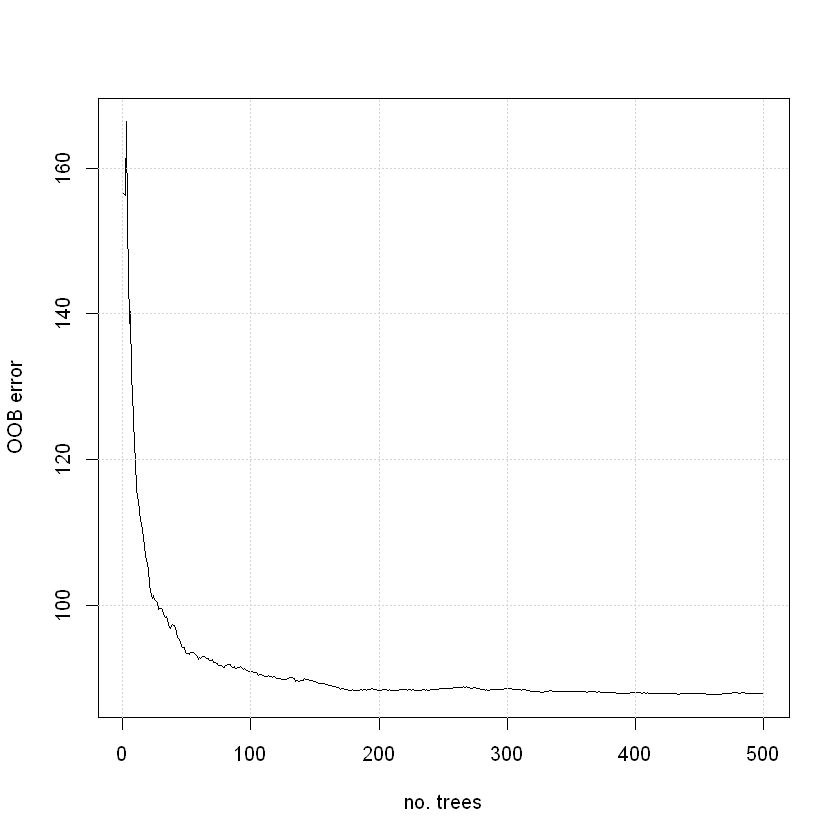

In [46]:
plot(rf.prec2$mse, type = "l", xlab = "no. trees",
ylab = "OOB error"); grid()

* En este caso tarda más en estabilizarse el error y tomamos 200 como valor óptimo.


Utiliza los bosques óptimos encontrados para predecir la cantidad en el test, y conserva las predicciones obtenidas.

Construye las predicciones completas (ocurrencia×cantidad) de test y valídalas en función de las mismas métricas utilizadas en el apartado anterior.

Pregunta: Compara estos resultados con los obtenidos para árboles individuales. ¿Qué conclusiones obtienes de la comparación entre árboles individuales y random forests?

In [47]:
ntree <- 200
set.seed(1)
rf.prec.opt2 <- randomForest(precipitacion ~ .,  df.prec, subset = ind.train2, ntree = ntree, mtry = mtry.prec)

In [48]:
pred.prec2 <- predict(rf.prec.opt2, df.prec[ind.test2, ])

In [49]:
pred.completa <- pred.prec * (as.numeric(pred.occ)-1)

In [50]:
y.test2 <- y[ind.test2]

In [51]:
#validacion
#ocurrencia
print("ocurrencia")
print(paste0("accuracy: ",acc.class(pred.occ,occ[ind.test])))
print("---")
#cantidad
print("cantidad")
print(paste0("rmse: ",rmse(y.test,pred.prec)))
print(paste0("spearman: ",cor(y.test,pred.prec,method="spearman")))
print(paste0("ratio.var: ",var(pred.prec)/var(y.test)))
print("---")
#cantidad lluvia
print("cantidad solo lluvia")
print(paste0("rmse: ",rmse(y.test2,pred.prec2)))
print(paste0("spearman: ",cor(y.test2,pred.prec2,method="spearman")))
print(paste0("ratio.var: ",var(pred.prec2)/var(y.test2)))
print("---")
#completa
print("cantidad completa")
print(paste0("rmse: ",rmse(y.test,pred.completa)))
print(paste0("spearman: ",cor(y.test,pred.completa,method="spearman")))
print(paste0("ratio.var: ",var(pred.completa)/var(y.test)))

[1] "ocurrencia"
[1] "accuracy: 0.8728"
[1] "---"
[1] "cantidad"
[1] "rmse: 4.6676600620298"
[1] "spearman: 0.628798525078781"
[1] "ratio.var: 0.373191752261919"
[1] "---"
[1] "cantidad solo lluvia"
[1] "rmse: 8.80926135465906"
[1] "spearman: 0.363341852841774"
[1] "ratio.var: 0.213402883657277"
[1] "---"
[1] "cantidad completa"
[1] "rmse: 4.81902832515489"
[1] "spearman: 0.603886756215664"
[1] "ratio.var: 0.382822907653262"


* Se obtiene un una tasa de aciertos bastante buena para el bosque de ocurrencia. Por otro lado, respecto a los bosques de cantidad, distinguimos varios puntos: los modelos para la cantidaad y la cantidad multiplicada por ocurrencia presentan valores similares de las tres métricas. Por otro lado, respecto al modelo solo entrenado con los datos de lluvia, los modelos de cantidad y cantidad completa consiguen mejores valores de las tres métricas: un rsme menor, un coeficiente de spearman bastante más alto que el del modelo que toma solo lluvia, y una mayor explicación de la varianza. Esto ocurre por la misma razón que en el caso de los árboles: la muestra con solo los días lluviosos pierde representación de los datos.

* Por último, comparamos estos resultados con los obtenidos en los árboles individuales. Respecto al accuracy se obtiene un valor ligeramente más alto con bosques que con árboles. Por otro lado, en el caso de la predicción de cantidad, tanto el bosque con el train completo como con el train solamente con días de lluvia presenta mejores valores de las métricas de validación que el árbol correspondiente: el rmse disminuye, el coeficiente de Spearman aumenta, y el ratio de varianzas aumenta. En general, los bosques han generalizado mejor que los árboles en los datos de test.

## Modelos lineales generalizados (GLMs) (1.5 puntos)

Usaremos a continuación GLMs para el mismo problema abordado en los apartados anteriores. Como ya hemos visto en otras sesiones, debemos utilizar la familia binomial con función de enlace logit (regresión logística) para clasificación y la familia Gamma con función de enlace logarítmica para la cantidad.

Comenzamos con el modelo para la ocurrencia.

Una vez tenemos el modelo, lo utilizamos para predecir en el test. Tendremos que convertir la predicción probabilística obtenida en binaria (considera un umbral 0.5).

A continuación, ajustamos el modelo de cantidad. Para ello tenemos que seleccionar previamente los días de lluvia (la familia Gamma sólo acepta valores positivos).

Utilizamos el modelo obtenido para predecir la cantidad en el test.

De nuevo, multiplicamos la ocurrencia por la cantidad para obtener la predicción completa en el test y la validamos en función de las métricas de validación que utilizamos para CART y random forests.

Pregunta: Compara estos resultados con los obtenidos para CART y random forests. ¿Qué conclusiones obtienes?

In [73]:
## Incluir el codigo y responder a la cuestion
#modelo de ocurrencia
glm.occ = glm(ocurrencia ~ ., df.occ, subset = ind.train, family = binomial(link = "logit"))

pred.glm.occ = predict(glm.occ, df.occ[ind.test, ] , type = "response")
pred.glm.occ = ifelse(pred.glm.occ >= 0.5, 1, 0)

#modelo de cantidad
#datos para los que la precipitación tiene valores positivos
ind.train.pos <- ind.train[y[ind.train] > 0]
ind.test.pos <- ind.test[y[ind.test] > 0]
#df.rain <- data.frame(precipitacion=y[ind.train.pos], predictores = x[ind.train.pos, ])

t.glm1 = Sys.time()
glm.lluvia <- glm(precipitacion ~ ., df.prec ,subset = ind.train.pos, family = Gamma(link = "log"))
t.glm2 = Sys.time()
t.glm <- difftime(t.glm2, t.glm1, units = "secs")


pred.glm.lluvia <- predict(glm.lluvia, df.prec[ind.test, ], type = "response")

In [53]:
p.completa <- pred.glm.occ * pred.glm.lluvia

In [64]:
print(paste0("accuracy: ",acc.class(y.test,pred.glm.occ)))
print(paste0("rmse: ",rmse(y.test,p.completa)))
print(paste0("spearman: ",cor(y.test,p.completa,method="spearman")))
print(paste0("ration.var: ",var(p.completa)/var(y.test)))

[1] "accuracy: 0.6936"
[1] "rmse: 5.06319252437652"
[1] "spearman: 0.610557362595856"
[1] "ration.var: 0.726625425472346"


* En comparación con la predicción hecha para el árbol de regresión, se obtienen valores similares para el cofeficiente de spearman y para el rmse. Por el contrario, aumenta el valor del ratio de varianzas, indicando que el modelo lineal generalizado explica un porcentaje mayor de la varianza de los datos.

* Por otro lado, la ocurrencia predicha con glm tiene menos precisión que la del bosque de ocurrencia. Sin embargo, los resultados obtenidos para la cantidad son similares, siendo el ratio de varianzas mayor en el caso de modelos lineales generalizados.

## k nearest neighbors (k-NN) (1.5 puntos)

La última de las técnicas a utilizar será vecinos cercanos (ten en cuenta que en este caso ya no tendremos que predecir por separado ocurrencia y cantidad). Comenzaremos por una versión de k-NN en la que sólo se considere el vecino más cercano (utiliza la función knn.reg del paquete FNN).

Nota: Recuerda que en la técnica k-NN es muy importante pre-procesar adecuadamente (estandarizar) los predictores.

Como vimos en su día, el único parámetro a ajustar en la técnica k-NN es k (número de vecinos). Utilizaremos el paquete caret para encontrar el k óptimo en nuestro problema. Para ello, considera una cross-validación con 10 folds sobre el dataset de train y barre todos los k impares desde 1 a 50.

Utiliza este k óptimo para predecir en el test.

Valida las dos predicciones (con k=1 y con k=óptimo) en el test, en función de las medidas que se han ido utilizando en los apartados anteriores.

Pregunta: ¿Qué diferencias obtienes entre las dos versiones utilizadas de la técnica k-NN? ¿A qué se deben?

In [55]:
## Incluir el codigo y responder a la cuestion
library(FNN)
library(caret)
params.scaling = preProcess(x.train, method = c("center", "scale"))
x.train.scaled = scale(x.train, 
                     center = params.scaling$mean, scale = params.scaling$std)
x.test.scaled = scale(x.test, 
                    center = params.scaling$mean, scale = params.scaling$std)
pred.basico = knn.reg(train = x.train.scaled, test = x.test.scaled, 
             y = y.train, k = 1)

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice



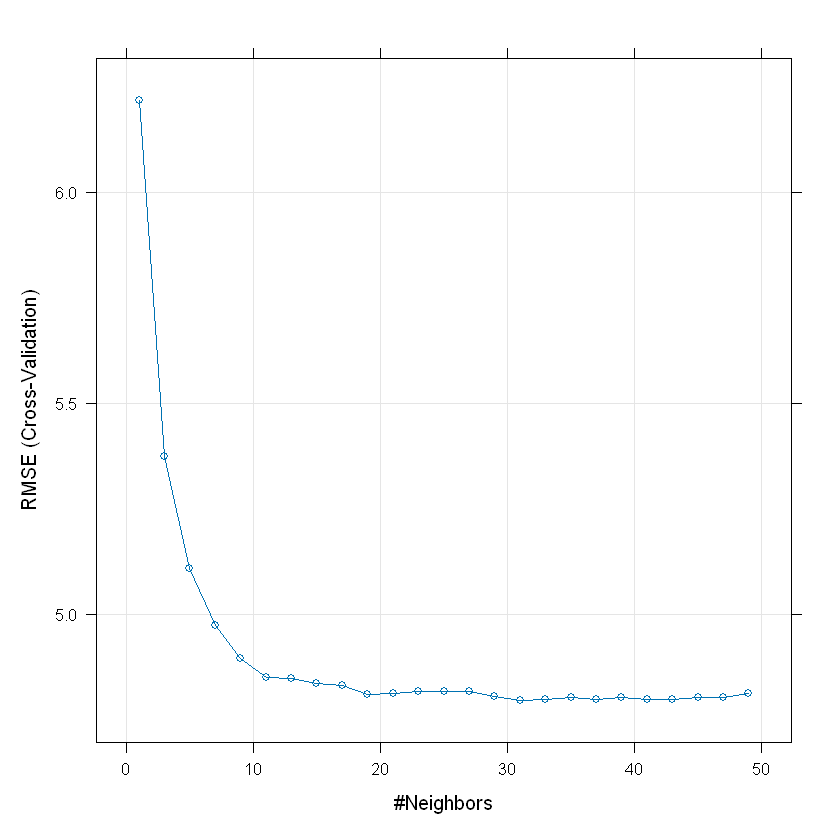

In [56]:
#cross-validation
set.seed(1)
trctrl = trainControl(method = "cv", number = 10)
knn.opt = train(precipitacion ~ ., df.prec, subset = ind.train,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(k = seq(1, 50, 2)))
plot(knn.opt)

Se ha tomado como k óptimo el menor de la zona en que el rmse se estabiliza. En este caso, hemos considerado la zona estable a partir de k=19.

In [74]:
t.knn1 = Sys.time()
pred.opt = knn.reg(train = x.train.scaled, test = x.test.scaled, 
             y = y.train, k = 19)
t.knn2 = Sys.time()
t.knn <- difftime(t.knn2, t.knn1, units = "secs")

In [58]:
#validacion
print(paste0("rmseBasico: ",rmse(y.test,pred.basico$pred)))
print(paste0("spearmanBasico: ",cor(y.test,pred.basico$pred,method="spearman")))
print(paste0("ration.varBasico: ",var(pred.basico$pred)/var(y.test)))
print('---')
print(paste0("rmseOpt: ",rmse(y.test,pred.opt$pred)))
print(paste0("spearmanOpt: ",cor(y.test,pred.opt$pred,method="spearman")))
print(paste0("ration.varOpt: ",var(pred.opt$pred)/var(y.test)))

[1] "rmseBasico: 6.73318587297276"
[1] "spearmanBasico: 0.536376849566577"
[1] "ration.varBasico: 1.1797729622145"
[1] "---"
[1] "rmseOpt: 4.6887843429783"
[1] "spearmanOpt: 0.620589118420968"
[1] "ration.varOpt: 0.24471353347621"


Se obtiene en términos del rmse un modelo más preciso con la configuración óptima que con k=1. Esto se debe a que un valor k=1 representa de manera muy simplificada el comportamiento alrededor del punto que se evalúa, haciendo que cuando haya algún caso irregular se le demasiada importancia. Esto, por otro lado, hace que las predicciones con este modelo tengan una varianza mayor, como se puede ver al comparar los cocientes de varianzas, de donde vemos que el knn con k=1 capta bien el ruido de la muestra. Por el contrario, el modelo con k=19 describe menos la varianza de las medidas de precipitación. Por último, respecto al coeficiente de correlación de Spearman, no se observan grandes diferencias entre uno y otro, aunque el modelo óptimo  demuestra una mayor relación entre la precipitación predicha y la medida.

## Conclusiones generales (2 puntos)

A la vista de los resultados obtenidos, argumenta razonadamente qué técnica o técnicas serían las mejores para la predicción de lluvia en Lisboa. Justifica tu respuesta.

* Para comparar, vamos a tomar de cada tipo de modelo, las métricas correspondientes a las predicciones completas en el test, y  el accuracy para la ocurrencia. Obtenemos lo siguiente:



| Modelo | Métrica   | Valor |
|--------|-----------|-------|
| knn    | rmse      | 4.69  |
| knn    | spearman  | 0.62  |
| knn    | ration.var| 0.24  |
| glm    | accuracy  | 0.69  |
| glm    | rmse      | 5.06  |
| glm    | spearman  | 0.61  |
| glm    | ration.var| 0.73  |
| rf     | accuracy  | 0.87  |
| rf     | rmse      | 4.82  |
| rf     | spearman  | 0.60  |
| rf     | ratio.var | 0.38  |
| tree   | accuracy  | 0.85  |
| tree   | rmse      | 4.89  |
| tree   | spearman  | 0.61  |
| tree   | ration.var| 0.22  |

* Vemos que el modelo lineal generalizado consigue un mayor valor del ratio de varianzas que el resto, aunque respecto al resto de métricas, el coeficiente de spearman es similar al de los otros modelos, mientras que el accuracy y el rmse son algo peores. Una varianza explicada por el modelo alta aporta información relevante, ya que nos puede interesar saber cómo de probable es que haya casos extremos, en este caso, de precipitación, o simplemente sobre qué valores se mueve la variable. Sin embargo, si lo que nos interesa es acercarnos en cada día al valor de precipitación real, las métricas relaccionadas con la correlación (spearman) y el error (accuracy y rsme) nos dan información más relevante sobre el comportamiento del modelo. Como vemos, un mayor ratio de varianzas no implica menores errores, que es lo que ha pasado en el caso de glm. Atendiendo entonces al rmse y al coeficiente de correlación de spearman, el resto de técnicas quedan bastante igualdas. De ellas, knn tiene unos valores un poco mejores. Si consideramos, además, los tiempos de entrenamiento de cada modelo mostrados en el diagrama de barras de abajo, entonces knn se presenta como la mejor opción, ya que alcanza predicciones igual de buenas que con los árboles, por un tiempo de computación bastante menor.

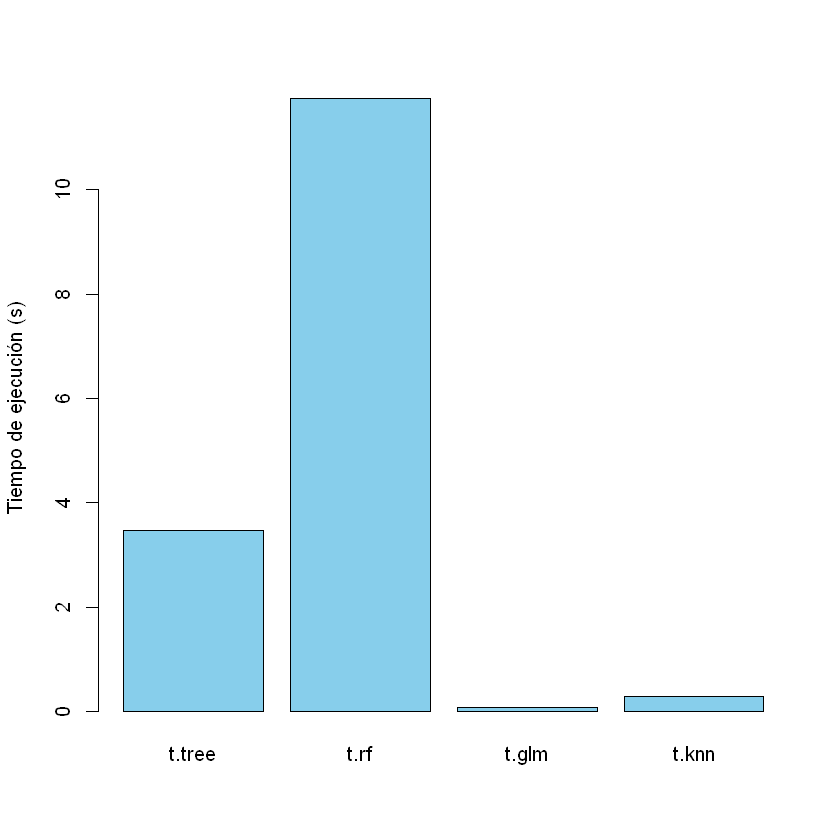

In [81]:

barplot(as.vector(c(t.tree,t.rf,t.glm,t.knn)), names.arg = c('t.tree','t.rf','t.glm','t.knn'), col = "skyblue", main = "", ylab = "Tiempo de ejecución (s)")

Comentarios Sixto

T03-Predicción (1.50+2.10+0.85+1.35+1.50 = 7.30):
Árboles de clasificación y regresión (2.5 puntos): De donde sale el 5 para el número de nodos terminales? Se justifica a posteriori. En el resto se usa un criterio similar, limitando mucho los árboles, si bien no se comenta. ¿Donde se construye la serie completa? Las medidas de evaluación no se aplican sobre la serie completa si no de forma independiente a las series predichas de cantidad y ocurrencia. Se comentan los resultados y se señala alguna posible justificación. Se refiere al ruido observacional si bien, dada la estructura de los árboles construidos, cómo puede darse una variabilidad comparable?
Random forests (2.5 puntos): Se razona la selección del número de árboles. Se obtiene sólo la serie completa para una de las predicciones, sesgando la comparación. Se vuelvan a evaluar de forma independiente los errores, incluyendo la parte continua de la serie completa construida. Se comparan los resultados.
Modelos lineales generalizados (GLMs) (1.5 puntos): Se impone un umbral diferente para la ocurrencia de precipitación. Se evalúa el accuracy de forma independiente. Se comentan los resultados pero no se alcanza ninguna conclusión. Los árboles y el random forest no requieren normalización, ocurer lo mismo en los GLMs?
k nearest neighbors (k-NN) (1.5 puntos): No se evalúa el accuracy. Se describen los resultados.
Conclusiones generales (2 puntos): Se resumen los resultados, reflejando las medidas faltantes que se han ido señalando, y se comentan los resultados. Del mismo modo, se extiende la discusión a los tiempos de cómputo requeridos por cada método.